# Zip and Map

In [1]:
import tensorflow as tf

In [2]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [3]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [4]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [5]:
dataset = tf.data.Dataset.range(100)
dataset

<RangeDataset shapes: (), types: tf.int64>

In [7]:
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset

<MapDataset shapes: (None,), types: tf.int64>

# Load Image Data

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [9]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 1s 0us/step


In [10]:
path_to_zip

'/root/.keras/datasets/cats_and_dogs.zip'

In [12]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)
train_dir = os.path.join(PATH, 'train')
print(train_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [13]:
BATCH_SIZE = 128
IMG_HEIGHT, IMG_WIDTH = (150, 150)

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [15]:
def plot_image(image):
  plt.imshow(image)
  plt.show();

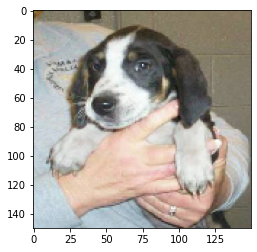

In [16]:
plot_image(train_data_gen[0][0][0])

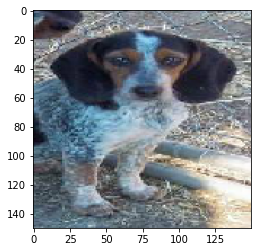

In [17]:
plot_image(train_data_gen[1][0][0])

# Image Data Augmentation

In [20]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           rotation_range=45,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=.15
                                           )
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [21]:
def plot_5_images(images):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show();

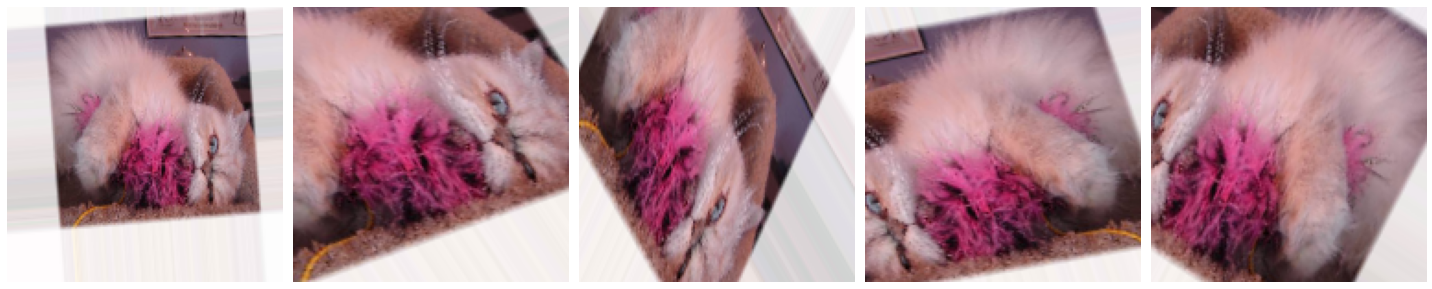

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_5_images(augmented_images)